In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("Data_Science.xlsx")

In [3]:
df.head()

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33,100,0
1,PxpmIXN1OIWh4Ne,Organic,Delhi,BRONZE,MALE,2018-12-25 19:19:11,90,80
2,kpGUDDDhKBkwePp,Organic,Mumbai,NaN,MALE,2019-01-15 11:24:56,50,1900
3,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18,10,1400
4,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13,80,290


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
UserId                        100 non-null object
campaign                      96 non-null object
realcity                      87 non-null object
membership                    58 non-null object
gender                        100 non-null object
createdAt                     100 non-null datetime64[ns]
Cost Of User Aciquistion      100 non-null int64
User Life Time Value (LTV)    100 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 6.3+ KB


In [5]:
df.realcity.value_counts()

Kolkata      24
Hyderabad    18
Mumbai       13
Pune         13
Bengaluru     7
Chennai       6
Delhi         5
chennai       1
Name: realcity, dtype: int64

In [6]:
df[['realcity', 'User Life Time Value (LTV)']].corr()

,User Life Time Value (LTV)
User Life Time Value (LTV),1.0


## There is a bug in code which makes realcity is NULL , there is two data pattern which can help developer to find root cause of it , can you identify it ?

In [7]:
df.realcity.replace(to_replace=np.nan, value="Null", inplace = True)

In [8]:
df.realcity.value_counts()

Kolkata      24
Hyderabad    18
Mumbai       13
Pune         13
Null         13
Bengaluru     7
Chennai       6
Delhi         5
chennai       1
Name: realcity, dtype: int64

In [9]:
df.realcity.replace(to_replace="chennai", value="Chennai", inplace = True)

In [10]:
df1 = df[df.realcity == "Null"]
df1.head()

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
6,B5Ah0a6gbSdW0sN,referral,Null,NaN,FEMALE,2019-01-02 12:41:00,90,12090
7,B5ADHXCBrham4Yh,FB-airolimindspace-borivali,Null,NaN,FEMALE,2018-12-25 16:45:25,50,0
14,B5AptFA1YmrQ4Rw,referral,Null,NaN,FEMALE,2019-02-11 10:06:11,80,290
17,B5A7usayVnZx87F,NaN,Null,GOLD,FEMALE,2015-11-25 03:24:36,50,0
26,B5AVSCakEhhBwyf,FB_050119_Pune,Null,NaN,FEMALE,2019-02-05 12:27:02,90,1900


In [11]:
df1.campaign.value_counts()

referral                       3
Organic                        3
FB_050119_Pune                 1
CPR-B1                         1
CPR_ A1                        1
FB-Device Targetting           1
FB-airolimindspace-borivali    1
Name: campaign, dtype: int64

In [12]:
df1.membership.value_counts()

GOLD      2
BRONZE    2
Name: membership, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
UserId                        100 non-null object
campaign                      96 non-null object
realcity                      100 non-null object
membership                    58 non-null object
gender                        100 non-null object
createdAt                     100 non-null datetime64[ns]
Cost Of User Aciquistion      100 non-null int64
User Life Time Value (LTV)    100 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 6.3+ KB


In [16]:
df1.createdAt.dt.weekday_name

6     Wednesday
7       Tuesday
14       Monday
17    Wednesday
26      Tuesday
30     Saturday
38       Monday
42    Wednesday
43    Wednesday
46       Monday
64       Monday
67     Thursday
90       Friday
Name: createdAt, dtype: object

In [18]:
df1.gender.value_counts()

FEMALE    13
Name: gender, dtype: int64

In [19]:
df1

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
6,B5Ah0a6gbSdW0sN,referral,Null,NaN,FEMALE,2019-01-02 12:41:00,90,12090
7,B5ADHXCBrham4Yh,FB-airolimindspace-borivali,Null,NaN,FEMALE,2018-12-25 16:45:25,50,0
14,B5AptFA1YmrQ4Rw,referral,Null,NaN,FEMALE,2019-02-11 10:06:11,80,290
17,B5A7usayVnZx87F,NaN,Null,GOLD,FEMALE,2015-11-25 03:24:36,50,0
26,B5AVSCakEhhBwyf,FB_050119_Pune,Null,NaN,FEMALE,2019-02-05 12:27:02,90,1900
30,B5A67AAZH7ZNqmV,Organic,Null,NaN,FEMALE,2019-03-02 18:23:52,100,9000
38,B5A3hUiOS7c0cba,CPR-B1,Null,GOLD,FEMALE,2019-02-18 12:33:30,10,290
42,B5AN9fane0lv2hF,CPR_ A1,Null,NaN,FEMALE,2019-01-02 11:26:25,50,80
43,B5A7RbmptBEYVbw,Organic,Null,NaN,FEMALE,2017-12-06 09:51:03,10,1900
46,B5Ac4U9f5tuEkfI,NaN,Null,BRONZE,FEMALE,2015-11-02 14:18:02,90,234


In [22]:
df[~(df.realcity == "Null")]

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33,100,0
1,PxpmIXN1OIWh4Ne,Organic,Delhi,BRONZE,MALE,2018-12-25 19:19:11,90,80
2,kpGUDDDhKBkwePp,Organic,Mumbai,NaN,MALE,2019-01-15 11:24:56,50,1900
3,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18,10,1400
4,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13,80,290
5,XuxQ7HB4MSE3eMI,CPR-B1,Mumbai,NaN,MALE,2018-12-20 07:10:59,100,234
8,INtl6ZR75QUyz7y,referral,Kolkata,NaN,MALE,2019-01-20 12:43:36,10,80
9,ylAiQ2lZuO5g1vp,Organic,Hyderabad,BRONZE,MALE,2017-09-01 11:52:18,80,1900
10,eyd5aLusSqA0c3f,referral,Kolkata,NaN,MALE,2019-01-31 09:08:13,100,1400
11,hF8azvA0BWFyNlg,referral,Kolkata,NaN,MALE,2019-02-09 17:29:08,90,290


## What is significance relationship between Gender and Membership?

In [25]:
male = df[df.gender == "MALE"]

In [28]:
male.membership.value_counts()

BRONZE    25
GOLD       7
SILVER     4
Name: membership, dtype: int64

In [29]:
female = df[df.gender == "FEMALE"]

In [30]:
female.membership.value_counts()

GOLD      11
BRONZE     7
SILVER     1
Name: membership, dtype: int64

# SQL Questions

In [46]:
import pandasql as ps

In [47]:
data = ps.sqldf("select * from df;")

In [48]:
data

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33.000000,100,0
1,PxpmIXN1OIWh4Ne,Organic,Delhi,BRONZE,MALE,2018-12-25 19:19:11.000000,90,80
2,kpGUDDDhKBkwePp,Organic,Mumbai,None,MALE,2019-01-15 11:24:56.000000,50,1900
3,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18.000000,10,1400
4,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13.000000,80,290
5,XuxQ7HB4MSE3eMI,CPR-B1,Mumbai,None,MALE,2018-12-20 07:10:59.000000,100,234
6,B5Ah0a6gbSdW0sN,referral,Null,None,FEMALE,2019-01-02 12:41:00.000000,90,12090
7,B5ADHXCBrham4Yh,FB-airolimindspace-borivali,Null,None,FEMALE,2018-12-25 16:45:25.000000,50,0
8,INtl6ZR75QUyz7y,referral,Kolkata,None,MALE,2019-01-20 12:43:36.000000,10,80
9,ylAiQ2lZuO5g1vp,Organic,Hyderabad,BRONZE,MALE,2017-09-01 11:52:18.000000,80,1900


In [41]:
ps.sqldf("select * from df where realcity = 'Pune';")

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV)
0,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18.000000,10,1400
1,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13.000000,80,290
2,ZUMDczsKyqiPqAM,referral,Pune,GOLD,MALE,2018-11-19 15:02:19.000000,90,1900
3,cJpR4eum0zGmqEO,Organic,Pune,SILVER,MALE,2019-01-02 11:26:25.000000,80,234
4,Dl82cBevuNt1A7n,Organic,Pune,GOLD,MALE,2019-04-18 12:47:34.000000,100,290
5,b5pBMEFjvJLZjPR,event1,Pune,BRONZE,MALE,2019-04-17 08:34:26.000000,10,234
6,7TMfsZpRRSrMD0K,CPR_A1,Pune,GOLD,MALE,2019-02-02 12:39:11.000000,100,8772
7,3K0K9xbf05K9NVh,Organic,Pune,SILVER,MALE,2018-07-17 16:41:15.000000,90,0
8,hPD1iE4fjQxsxyA,Organic,Pune,None,MALE,2018-08-21 05:14:48.000000,50,80
9,QDjfNxeya1gaEFA,Organic,Pune,GOLD,MALE,2019-02-25 07:08:59.000000,80,1400


In [44]:
ps.sqldf("select max(createdAt) from df")

,max(createdAt)
0,2019-04-25 11:52:25.000000


In [45]:
ps.sqldf("select min(createdAt) from df")

,min(createdAt)
0,2015-11-02 14:18:02.000000


In [53]:
ps.sqldf("select year(createdAt) from df")

PandaSQLException: (sqlite3.OperationalError) no such function: year [SQL: 'select year(createdAt) from df'] (Background on this error at: http://sqlalche.me/e/e3q8)

In [55]:
df.createdAt.dt.date

0     2018-11-25
1     2018-12-25
2     2019-01-15
3     2018-04-30
4     2018-09-23
5     2018-12-20
6     2019-01-02
7     2018-12-25
8     2019-01-20
9     2017-09-01
10    2019-01-31
11    2019-02-09
12    2019-01-14
13    2017-12-02
14    2019-02-11
15    2018-09-12
16    2019-01-02
17    2015-11-25
18    2019-01-30
19    2018-08-21
20    2018-08-12
21    2018-02-07
22    2018-06-29
23    2019-02-27
24    2018-06-25
25    2017-06-02
26    2019-02-05
27    2018-07-05
28    2018-11-09
29    2018-03-22
         ...    
70    2019-01-27
71    2019-01-30
72    2018-02-15
73    2019-04-17
74    2019-02-02
75    2018-07-17
76    2018-08-21
77    2018-08-01
78    2018-11-13
79    2018-06-12
80    2018-09-10
81    2017-12-02
82    2018-08-20
83    2019-01-28
84    2019-01-02
85    2019-01-25
86    2018-09-20
87    2019-01-31
88    2019-02-25
89    2019-02-25
90    2019-03-22
91    2017-11-02
92    2019-04-25
93    2018-09-23
94    2018-09-15
95    2019-01-27
96    2019-01-15
97    2018-05-

In [57]:
df['created_date'] = df.createdAt.dt.date

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
UserId                        100 non-null object
campaign                      96 non-null object
realcity                      100 non-null object
membership                    58 non-null object
gender                        100 non-null object
createdAt                     100 non-null datetime64[ns]
Cost Of User Aciquistion      100 non-null int64
User Life Time Value (LTV)    100 non-null int64
created_date                  100 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 7.1+ KB


In [59]:
df['created_date'] = pd.to_datetime(df['created_date'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
UserId                        100 non-null object
campaign                      96 non-null object
realcity                      100 non-null object
membership                    58 non-null object
gender                        100 non-null object
createdAt                     100 non-null datetime64[ns]
Cost Of User Aciquistion      100 non-null int64
User Life Time Value (LTV)    100 non-null int64
created_date                  100 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 7.1+ KB


In [61]:
df.head()

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV),created_date
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33,100,0,2018-11-25
1,PxpmIXN1OIWh4Ne,Organic,Delhi,BRONZE,MALE,2018-12-25 19:19:11,90,80,2018-12-25
2,kpGUDDDhKBkwePp,Organic,Mumbai,NaN,MALE,2019-01-15 11:24:56,50,1900,2019-01-15
3,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18,10,1400,2018-04-30
4,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13,80,290,2018-09-23


In [66]:
ps.sqldf("select created_date, count(UserId) from df where created_date >= '2017-01-01' group by created_date")

,created_date,count(UserId)
0,2017-04-08 00:00:00.000000,1
1,2017-06-02 00:00:00.000000,1
2,2017-08-09 00:00:00.000000,1
3,2017-09-01 00:00:00.000000,1
4,2017-10-08 00:00:00.000000,1
5,2017-10-24 00:00:00.000000,1
6,2017-11-02 00:00:00.000000,1
7,2017-12-02 00:00:00.000000,4
8,2017-12-06 00:00:00.000000,1
9,2018-02-07 00:00:00.000000,1


### What is the total cost of female user acquisition from campaign starting from CPR , FB , Play store for each City?

In [67]:
df.head()

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV),created_date
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33,100,0,2018-11-25
1,PxpmIXN1OIWh4Ne,Organic,Delhi,BRONZE,MALE,2018-12-25 19:19:11,90,80,2018-12-25
2,kpGUDDDhKBkwePp,Organic,Mumbai,NaN,MALE,2019-01-15 11:24:56,50,1900,2019-01-15
3,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18,10,1400,2018-04-30
4,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13,80,290,2018-09-23


In [91]:
ps.sqldf("select sum(cost_acq) from (select * from df where substr(campaign,1,3) = 'CPR' or substr(campaign,1,2) = 'FB' or \
                                    substr(campaign,1,9) = 'Playstore')a\
                                    where gender = 'FEMALE'")

,sum(cost_acq)
0,290


In [83]:
ps.sqldf("select * from df where substr(campaign,1,3) = 'CPR' or substr(campaign,1,2) = 'FB' or \
                                    substr(campaign,1,9) = 'Playstore'")

,UserId,campaign,realcity,membership,gender,createdAt,Cost Of User Aciquistion,User Life Time Value (LTV),created_date
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33.000000,100,0,2018-11-25 00:00:00.000000
1,XuxQ7HB4MSE3eMI,CPR-B1,Mumbai,None,MALE,2018-12-20 07:10:59.000000,100,234,2018-12-20 00:00:00.000000
2,B5ADHXCBrham4Yh,FB-airolimindspace-borivali,Null,None,FEMALE,2018-12-25 16:45:25.000000,50,0,2018-12-25 00:00:00.000000
3,ds8yzEX06egUIH4,FB-Device Targetting,Mumbai,BRONZE,MALE,2019-01-14 03:48:15.000000,50,234,2019-01-14 00:00:00.000000
4,F3OzLeNrNHf4MQu,FB-Kolkata-Bikepool,Kolkata,BRONZE,MALE,2019-02-27 06:54:15.000000,10,2342,2019-02-27 00:00:00.000000
5,B5AVSCakEhhBwyf,FB_050119_Pune,Null,None,FEMALE,2019-02-05 12:27:02.000000,90,1900,2019-02-05 00:00:00.000000
6,AY66rr1B5kxi0Xz,CPR-B1,Hyderabad,None,MALE,2018-12-25 05:28:41.000000,80,0,2018-12-25 00:00:00.000000
7,B5A3hUiOS7c0cba,CPR-B1,Null,GOLD,FEMALE,2019-02-18 12:33:30.000000,10,290,2019-02-18 00:00:00.000000
8,B5AN9fane0lv2hF,CPR_ A1,Null,None,FEMALE,2019-01-02 11:26:25.000000,50,80,2019-01-02 00:00:00.000000
9,QlvMDcrooZGowhA,Playstore-HD-Delhi-sec5 Rohini,Delhi,None,MALE,2018-10-26 09:13:50.000000,80,1400,2018-10-26 00:00:00.000000


In [108]:
ps.sqldf("select cost_acq from df")

OperationalError: (sqlite3.OperationalError) too many SQL variables [SQL: 'INSERT INTO df ("UserId", campaign, realcity, membership, gender, "createdAt", cost_acq, "User Life Time Value (LTV)", created_date, month) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'] [parameters: ('u6Whdqhc9pbfpM2', 'FB-Device Targetting', 'Bengaluru', 'BRONZE', 'MALE', '2018-11-25 17:38:33.000000', 100, 0, '2018-11-25 00:00:00.000000', 11, 'PxpmIXN1OIWh4Ne', 'Organic', 'Delhi', 'BRONZE', 'MALE', '2018-12-25 19:19:11.000000', 90, 80, '2018-12-25 00:00:00.000000', 12, 'kpGUDDDhKBkwePp', 'Organic', 'Mumbai', None, 'MALE', '2019-01-15 11:24:56.000000', 50, 1900, '2019-01-15 00:00:00.000000', 1, 'BVmM3wUNvspBSrc', 'Organic', 'Pune', 'BRONZE', 'MALE', '2018-04-30 17:17:18.000000', 10, 1400, '2018-04-30 00:00:00.000000', 4, 'J9jtLsR52ylRDZ9', 'Organic', 'Pune', 'GOLD', 'MALE', '2018-09-23 10:50:13.000000', 80, 290, '2018-09-23 00:00:00.000000', 9, 'XuxQ7HB4MSE3eMI', 'CPR-B1', 'Mumbai', None, 'MALE', '2018-12-20 07:10:59.000000', 100, 234, '2018-12-20 00:00:00.000000', 12, 'B5Ah0a6gbSdW0sN', 'referral', 'Null', None, 'FEMALE', '2019-01-02 12:41:00.000000', 90, 12090, '2019-01-02 00:00:00.000000', 1, 'B5ADHXCBrham4Yh', 'FB-airolimindspace-borivali', 'Null', None, 'FEMALE', '2018-12-25 16:45:25.000000', 50, 0, '2018-12-25 00:00:00.000000', 12, 'INtl6ZR75QUyz7y', 'referral', 'Kolkata', None, 'MALE', '2019-01-20 12:43:36.000000', 10, 80, '2019-01-20 00:00:00.000000', 1, 'ylAiQ2lZuO5g1vp', 'Organic', 'Hyderabad', 'BRONZE', 'MALE', '2017-09-01 11:52:18.000000', 80, 1900, '2017-09-01 00:00:00.000000', 9, 'eyd5aLusSqA0c3f', 'referral', 'Kolkata', None, 'MALE', '2019-01-31 09:08:13.000000', 100, 1400, '2019-01-31 00:00:00.000000', 1, 'hF8azvA0BWFyNlg', 'referral', 'Kolkata', None, 'MALE', '2019-02-09 17:29:08.000000', 90, 290, '2019-02-09 00:00:00.000000', 2, 'ds8yzEX06egUIH4', 'FB-Device Targetting', 'Mumbai', 'BRONZE', 'MALE', '2019-01-14 03:48:15.000000', 50, 234, '2019-01-14 00:00:00.000000', 1, '4FYsTNCkH9TRX8j', 'event1', 'Chennai', 'BRONZE', 'MALE', '2017-12-02 18:37:43.000000', 10, 23423, '2017-12-02 00:00:00.000000', 12, 'B5AptFA1YmrQ4Rw', 'referral', 'Null', None, 'FEMALE', '2019-02-11 10:06:11.000000', 80, 290, '2019-02-11 00:00:00.000000', 2, 'aLWYdfa1Kr73FXP', 'referral', 'Kolkata', 'GOLD', 'FEMALE', '2018-09-12 09:36:03.000000', 100, 234, '2018-09-12 00:00:00.000000', 9, 'JobSSREfBvqwVhz', 'Organic', 'Kolkata', None, 'MALE', '2019-01-02 11:26:25.000000', 90, 23423, '2019-01-02 00:00:00.000000', 1, 'B5A7usayVnZx87F', None, 'Null', 'GOLD', 'FEMALE', '2015-11-25 03:24:36.000000', 50, 0, '2015-11-25 00:00:00.000000', 11, 'bBBVSdCJcdeWFJb', 'Organic', 'Chennai', None, 'MALE', '2019-01-30 19:10:36.000000', 10, 80, '2019-01-30 00:00:00.000000', 1, 'WOXgT6oUuBJvrxG', 'referral', 'Kolkata', 'GOLD', 'FEMALE', '2018-08-21 10:26:14.000000', 80, 1900, '2018-08-21 00:00:00.000000', 8, 'R8V6kHQSaAfmk75', 'referral', 'Kolkata', None, 'MALE', '2018-08-12 16:11:49.000000', 100, 1400, '2018-08-12 00:00:00.000000', 8, 'dKkTPwpTW1rftU7', 'Organic', 'Hyderabad', 'BRONZE', 'MALE', '2018-02-07 12:34:40.000000', 90, 290, '2018-02-07 00:00:00.000000', 2, '1pACHaS8EiQReN1', 'Organic', 'Mumbai', 'BRONZE', 'MALE', '2018-06-29 18:44:04.000000', 50, 234, '2018-06-29 00:00:00.000000', 6, 'F3OzLeNrNHf4MQu', 'FB-Kolkata-Bikepool', 'Kolkata', 'BRONZE', 'MALE', '2019-02-27 06:54:15.000000', 10, 2342, '2019-02-27 00:00:00.000000', 2, 'kYo1qK1E28pJoyO', 'referral', 'Kolkata', 'BRONZE', 'MALE', '2018-06-25 10:52:24.000000', 80, 0, '2018-06-25 00:00:00.000000', 6, 'HKr6oVHFyn6VnUu', 'Mumbai_1% Lookalike_Android (2)', 'Mumbai', 'BRONZE', 'MALE', '2017-06-02 09:46:16.000000', 100, 80, '2017-06-02 00:00:00.000000', 6, 'B5AVSCakEhhBwyf', 'FB_050119_Pune', 'Null', None, 'FEMALE', '2019-02-05 12:27:02.000000', 90, 1900, '2019-02-05 00:00:00.000000', 2, 'hOS9vhtdD8sxaws', 'event5', 'Bengaluru', 'BRONZE', 'MALE', '2018-07-05 13:45:03.000000', 50, 1400, '2018-07-05 00:00:00.000000', 7, '1cITwLemEQkX6iM', None, 'Chennai', 'BRONZE', 'MALE', '2018-11-09 04:26:03.000000', 10, 290, '2018-11-09 00:00:00.000000', 11, 'j8CY5vrxAXin6TD', 'referral', 'Kolkata', 'GOLD', 'FEMALE', '2018-03-22 07:28:39.000000', 80, 234, '2018-03-22 00:00:00.000000', 3, 'B5A67AAZH7ZNqmV', 'Organic', 'Null', None, 'FEMALE', '2019-03-02 18:23:52.000000', 100, 9000, '2019-03-02 00:00:00.000000', 3, 'sMy8hdoo30Ksv44', 'referral', 'Mumbai', 'GOLD', 'FEMALE', '2018-11-28 16:57:25.000000', 90, 290, '2018-11-28 00:00:00.000000', 11, 'pFCwOY0YoaVGdDX', 'Organic', 'Kolkata', None, 'MALE', '2018-12-06 09:10:44.000000', 50, 234, '2018-12-06 00:00:00.000000', 12, 'EsZqdQPc8k1TfV4', 'event1', 'Bengaluru', 'BRONZE', 'MALE', '2018-07-02 10:30:40.000000', 10, 8772, '2018-07-02 00:00:00.000000', 7, 'AY66rr1B5kxi0Xz', 'CPR-B1', 'Hyderabad', None, 'MALE', '2018-12-25 05:28:41.000000', 80, 0, '2018-12-25 00:00:00.000000', 12, 'evXJoFn2u6xE5lu', 'Organic', 'Hyderabad', None, 'MALE', '2017-08-09 02:39:43.000000', 100, 80, '2017-08-09 00:00:00.000000', 8, 'ZUMDczsKyqiPqAM', 'referral', 'Pune', 'GOLD', 'MALE', '2018-11-19 15:02:19.000000', 90, 1900, '2018-11-19 00:00:00.000000', 11, 'NJwBcqbxVTwec6b', 'referral', 'Hyderabad', 'BRONZE', 'Male', '2017-10-24 06:49:45.000000', 50, 1400, '2017-10-24 00:00:00.000000', 10, 'B5A3hUiOS7c0cba', 'CPR-B1', 'Null', 'GOLD', 'FEMALE', '2019-02-18 12:33:30.000000', 10, 290, '2019-02-18 00:00:00.000000', 2, '2Plx2qIpKRYsO7f', 'referral', 'Delhi', 'SILVER', 'MALE', '2019-01-04 06:05:58.000000', 80, 234, '2019-01-04 00:00:00.000000', 1, 'WDREzJ4BvvMTjwS', 'Organic', 'Hyderabad', 'GOLD', 'FEMALE', '2019-01-02 12:41:00.000000', 100, 123123, '2019-01-02 00:00:00.000000', 1, '74gXjndZr8AYlW4', 'referral', 'Kolkata', None, 'MALE', '2017-12-02 18:37:43.000000', 90, 0, '2017-12-02 00:00:00.000000', 12, 'B5AN9fane0lv2hF', 'CPR_ A1', 'Null', None, 'FEMALE', '2019-01-02 11:26:25.000000', 50, 80, '2019-01-02 00:00:00.000000', 1, 'B5A7RbmptBEYVbw', 'Organic', 'Null', None, 'FEMALE', '2017-12-06 09:51:03.000000', 10, 1900, '2017-12-06 00:00:00.000000', 12, 'QlvMDcrooZGowhA', 'Playstore-HD-Delhi-sec5 Rohini', 'Delhi', None, 'MALE', '2018-10-26 09:13:50.000000', 80, 1400, '2018-10-26 00:00:00.000000', 10, '8y3nH074ru36yGM', 'Organic', 'Mumbai', 'BRONZE', 'FEMALE', '2018-08-02 13:51:13.000000', 100, 290, '2018-08-02 00:00:00.000000', 8, 'B5Ac4U9f5tuEkfI', None, 'Null', 'BRONZE', 'FEMALE', '2015-11-02 14:18:02.000000', 90, 234, '2015-11-02 00:00:00.000000', 11, 'kRMLlWuMYlAWfr4', 'referral', 'Mumbai', 'GOLD', 'Female', '2019-01-02 12:41:00.000000', 50, 8772, '2019-01-02 00:00:00.000000', 1, 'De7bQsXBzj1M3MT', 'referral', 'Hyderabad', 'BRONZE', 'MALE', '2017-12-02 18:37:43.000000', 10, 290, '2017-12-02 00:00:00.000000', 12, 'cJpR4eum0zGmqEO', 'Organic', 'Pune', 'SILVER', 'MALE', '2019-01-02 11:26:25.000000', 80, 234, '2019-01-02 00:00:00.000000', 1, 'yoeHDTfDae6hcbS', None, 'Bengaluru', 'BRONZE', 'MALE', '2016-10-02 15:39:58.000000', 100, 123123, '2016-10-02 00:00:00.000000', 10, '2Yiv5NACfR4nIFj', 'referral', 'Kolkata', None, 'Male', '2018-07-25 12:48:45.000000', 90, 0, '2018-07-25 00:00:00.000000', 7, 'cf2HhqItIzE8LRG', 'event1', 'Delhi', None, 'MALE', '2019-02-27 08:43:32.000000', 50, 80, '2019-02-27 00:00:00.000000', 2, 'jt9Kwp4C9fWKxoM', 'referral', 'Kolkata', None, 'MALE', '2019-02-01 07:15:25.000000', 10, 1900, '2019-02-01 00:00:00.000000', 2, '97OABLb7ezSBPkS', 'Organic', 'Chennai', None, 'MALE', '2019-02-21 17:26:37.000000', 80, 1400, '2019-02-21 00:00:00.000000', 2, 'GAVWGpgWApExguB', 'Organic', 'Hyderabad', None, 'MALE', '2019-03-02 02:17:22.000000', 100, 290, '2019-03-02 00:00:00.000000', 3, 'lQflgDIV8sKvybt', 'referral', 'Mumbai', 'GOLD', 'FEMALE', '2018-11-27 11:49:29.000000', 90, 234, '2018-11-27 00:00:00.000000', 11, 'r8kWFuMRAgKyFgb', 'event1', 'Mumbai', 'BRONZE', 'Male', '2019-03-02 18:23:52.000000', 50, 8772, '2019-03-02 00:00:00.000000', 3, 'vWv5dFqiTayYdN4', 'event1', 'Bengaluru', 'BRONZE', 'MALE', '2018-07-02 10:30:40.000000', 10, 0, '2018-07-02 00:00:00.000000', 7, 'P3JreKJVES0Ek9a', 'Organic', 'Mumbai', 'GOLD', 'FEMALE', '2019-01-02 12:41:00.000000', 80, 80, '2019-01-02 00:00:00.000000', 1, 'LNNwvmmGErbq4HP', 'referral', 'Hyderabad', 'BRONZE', 'FEMALE', '2017-10-08 18:27:35.000000', 100, 1900, '2017-10-08 00:00:00.000000', 10, '96S1VyTXPJlR3S7', 'FB-iOS-Int-170219', 'Chennai', None, 'MALE', '2019-03-11 03:35:55.000000', 90, 1400, '2019-03-11 00:00:00.000000', 3, 'kr85jq8TmxhClK8', 'referral', 'Hyderabad', 'BRONZE', 'FEMALE', '2017-04-08 06:04:26.000000', 50, 290, '2017-04-08 00:00:00.000000', 4, 'AmPWmYcLoyzzZ7R', 'Playstore-EcommercePurchase-ReviewCompleted', 'Kolkata', None, 'MALE', '2019-04-15 08:14:19.000000', 10, 234, '2019-04-15 00:00:00.000000', 4, 'B5AJKPrHoiEAmT7', 'referral', 'Null', 'BRONZE', 'FEMALE', '2015-11-02 15:36:48.000000', 80, 29384, '2015-11-02 00:00:00.000000', 11, 'Dl82cBevuNt1A7n', 'Organic', 'Pune', 'GOLD', 'MALE', '2019-04-18 12:47:34.000000', 100, 290, '2019-04-18 00:00:00.000000', 4, 'i7VhRtuHQLAWzI2', 'Organic', 'Hyderabad', None, 'MALE', '2018-09-06 11:37:22.000000', 90, 234, '2018-09-06 00:00:00.000000', 9, 'B5AdatI2EanvL3x', 'Organic', 'Null', None, 'FEMALE', '2018-09-20 16:38:33.000000', 50, 243234, '2018-09-20 00:00:00.000000', 9, 'kgxLzzxMxQq1QgI', 'Organic', 'Kolkata', None, 'MALE', '2018-07-25 13:25:21.000000', 10, 0, '2018-07-25 00:00:00.000000', 7, '1ZDzlabElGjGDIY', 'event1', 'Hyderabad', None, 'MALE', '2019-04-01 07:35:28.000000', 80, 80, '2019-04-01 00:00:00.000000', 4, '0rsKBAPs09oN5h0', 'Organic', 'Kolkata', None, 'MALE', '2019-01-27 06:50:43.000000', 100, 1900, '2019-01-27 00:00:00.000000', 1, 'HwoYrI4xz40A909', 'Organic', 'Kolkata', None, 'MALE', '2019-01-30 12:42:17.000000', 90, 1400, '2019-01-30 00:00:00.000000', 1, 'iIJPMW4eNxCm6Dq', 'Organic', 'Chennai', 'BRONZE', 'MALE', '2018-02-15 10:44:35.000000', 50, 290, '2018-02-15 00:00:00.000000', 2, 'b5pBMEFjvJLZjPR', 'event1', 'Pune', 'BRONZE', 'MALE', '2019-04-17 08:34:26.000000', 10, 234, '2019-04-17 00:00:00.000000', 4, '7TMfsZpRRSrMD0K', 'CPR_A1', 'Pune', 'GOLD', 'MALE', '2019-02-02 12:39:11.000000', 100, 8772, '2019-02-02 00:00:00.000000', 2, '3K0K9xbf05K9NVh', 'Organic', 'Pune', 'SILVER', 'MALE', '2018-07-17 16:41:15.000000', 90, 0, '2018-07-17 00:00:00.000000', 7, 'hPD1iE4fjQxsxyA', 'Organic', 'Pune', None, 'MALE', '2018-08-21 05:14:48.000000', 50, 80, '2018-08-21 00:00:00.000000', 8, 'j3dfZwC1UqpXhs5', 'referral', 'Bengaluru', 'BRONZE', 'MALE', '2018-08-01 09:13:33.000000', 10, 1900, '2018-08-01 00:00:00.000000', 8, 'cPQZJZVTDMzmdSQ', 'Organic', 'Hyderabad', 'BRONZE', 'MALE', '2018-11-13 13:18:42.000000', 80, 1400, '2018-11-13 00:00:00.000000', 11, 'nPQaZ0ndeYoZeTV', 'referral', 'Hyderabad', 'BRONZE', 'FEMALE', '2018-06-12 14:37:00.000000', 100, 290, '2018-06-12 00:00:00.000000', 6, 'EKtOTDoXY45w7AM', 'referral', 'Delhi', 'BRONZE', 'FEMALE', '2018-09-10 08:37:39.000000', 90, 234, '2018-09-10 00:00:00.000000', 9, '2Wtck8kBWRE049R', 'Organic', 'Mumbai', 'SILVER', 'FEMALE', '2017-12-02 08:43:01.000000', 50, 283479, '2017-12-02 00:00:00.000000', 12, '42SvnlukTqrAEDt', 'Organic', 'Hyderabad', 'GOLD', 'FEMALE', '2018-08-20 13:03:26.000000', 10, 290, '2018-08-20 00:00:00.000000', 8, 'kVBn4EFMq46JtUK', 'referral', 'Kolkata', None, 'MALE', '2019-01-28 06:53:04.000000', 80, 234, '2019-01-28 00:00:00.000000', 1, 'FPsEBL7h7Svpn0a', 'CPR-B1', 'Hyderabad', None, 'MALE', '2019-01-02 17:20:11.000000', 100, 2349080, '2019-01-02 00:00:00.000000', 1, 'kH7RARMrVSsakMM', 'referral', 'Kolkata', None, 'MALE', '2019-01-25 15:05:54.000000', 90, 0, '2019-01-25 00:00:00.000000', 1, 'NaF7WlbDuoFTqV2', 'event1', 'Chennai', 'BRONZE', 'MALE', '2018-09-20 09:46:55.000000', 50, 80, '2018-09-20 00:00:00.000000', 9, '2V34MkXtp1aFP5x', 'referral', 'Kolkata', None, 'MALE', '2019-01-31 14:25:47.000000', 10, 1900, '2019-01-31 00:00:00.000000', 1, 'QDjfNxeya1gaEFA', 'Organic', 'Pune', 'GOLD', 'MALE', '2019-02-25 07:08:59.000000', 80, 1400, '2019-02-25 00:00:00.000000', 2, 'RbdeBWe7qyjvM2B', 'FB_050119_Pune', 'Pune', None, 'MALE', '2019-02-25 03:20:56.000000', 100, 290, '2019-02-25 00:00:00.000000', 2, 'B5AgW4lT7Nn2Rv', 'FB-Device Targetting', 'Null', None, 'FEMALE', '2019-03-22 17:12:30.000000', 90, 234, '2019-03-22 00:00:00.000000', 3, '2qEKy4okRkX76Aq', 'referral', 'Hyderabad', 'GOLD', 'FEMALE', '2017-11-02 11:00:11.000000', 50, 234234, '2017-11-02 00:00:00.000000', 11, 'abPQrfxEHmHeIno', 'Organic', 'Hyderabad', 'SILVER', 'MALE', '2019-04-25 11:52:25.000000', 10, 0, '2019-04-25 00:00:00.000000', 4, '3YMJuiNdQSwDzoL', 'Playstore-Pune-Aundh', 'Pune', 'GOLD', 'MALE', '2018-09-23 13:07:48.000000', 80, 80, '2018-09-23 00:00:00.000000', 9, 'lxkaHtB08BTZeU3', 'Playstore-Mumbai-Growuser1', 'Mumbai', None, 'MALE', '2018-09-15 08:56:31.000000', 100, 1900, '2018-09-15 00:00:00.000000', 9, 'sp4wwCBNJ3UQQDX', 'referral', 'Kolkata', None, 'MALE', '2019-01-27 11:10:46.000000', 90, 1400, '2019-01-27 00:00:00.000000', 1, '5OGq3dGgbPAwi0E', 'CPR-B1', 'Pune', 'GOLD', 'MALE', '2019-01-15 17:45:26.000000', 50, 290, '2019-01-15 00:00:00.000000', 1, '7n3c6hhSIrsRhLV', 'event1', 'Kolkata', 'BRONZE', 'MALE', '2018-05-09 07:12:55.000000', 10, 234, '2018-05-09 00:00:00.000000', 5, 'UI06JVwdZImwne8', 'event1', 'Bengaluru', 'BRONZE', 'MALE', '2018-08-02 11:30:48.000000', 80, 234234, '2018-08-02 00:00:00.000000', 8, 'p9MTT0uhDWEZv6c', 'Organic', 'Kolkata', 'BRONZE', 'MALE', '2018-06-26 09:24:16.000000', 40, 290, '2018-06-26 00:00:00.000000', 6)] (Background on this error at: http://sqlalche.me/e/e3q8)

In [86]:
df.rename(columns = {'Cost Of User Aciquistion':'cost_acq'}, inplace=True)

In [87]:
df.columns

Index(['UserId', 'campaign', 'realcity', 'membership', 'gender', 'createdAt',
       'cost_acq', 'User Life Time Value (LTV)', 'created_date'],
      dtype='object')

### Find top five months where cost of campaigns where highest.

In [93]:
ps.sqldf("select month(created_date) from df")

PandaSQLException: (sqlite3.OperationalError) no such function: month [SQL: 'select month(created_date) from df'] (Background on this error at: http://sqlalche.me/e/e3q8)

In [101]:
df['month'] = df.created_date.dt.month

In [102]:
df.head()

,UserId,campaign,realcity,membership,gender,createdAt,cost_acq,User Life Time Value (LTV),created_date,month
0,u6Whdqhc9pbfpM2,FB-Device Targetting,Bengaluru,BRONZE,MALE,2018-11-25 17:38:33,100,0,2018-11-25,11
1,PxpmIXN1OIWh4Ne,Organic,Delhi,BRONZE,MALE,2018-12-25 19:19:11,90,80,2018-12-25,12
2,kpGUDDDhKBkwePp,Organic,Mumbai,NaN,MALE,2019-01-15 11:24:56,50,1900,2019-01-15,1
3,BVmM3wUNvspBSrc,Organic,Pune,BRONZE,MALE,2018-04-30 17:17:18,10,1400,2018-04-30,4
4,J9jtLsR52ylRDZ9,Organic,Pune,GOLD,MALE,2018-09-23 10:50:13,80,290,2018-09-23,9


In [107]:
ps.sqldf("select created_date from df")

OperationalError: (sqlite3.OperationalError) too many SQL variables [SQL: 'INSERT INTO df ("UserId", campaign, realcity, membership, gender, "createdAt", cost_acq, "User Life Time Value (LTV)", created_date, month) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?), (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'] [parameters: ('u6Whdqhc9pbfpM2', 'FB-Device Targetting', 'Bengaluru', 'BRONZE', 'MALE', '2018-11-25 17:38:33.000000', 100, 0, '2018-11-25 00:00:00.000000', 11, 'PxpmIXN1OIWh4Ne', 'Organic', 'Delhi', 'BRONZE', 'MALE', '2018-12-25 19:19:11.000000', 90, 80, '2018-12-25 00:00:00.000000', 12, 'kpGUDDDhKBkwePp', 'Organic', 'Mumbai', None, 'MALE', '2019-01-15 11:24:56.000000', 50, 1900, '2019-01-15 00:00:00.000000', 1, 'BVmM3wUNvspBSrc', 'Organic', 'Pune', 'BRONZE', 'MALE', '2018-04-30 17:17:18.000000', 10, 1400, '2018-04-30 00:00:00.000000', 4, 'J9jtLsR52ylRDZ9', 'Organic', 'Pune', 'GOLD', 'MALE', '2018-09-23 10:50:13.000000', 80, 290, '2018-09-23 00:00:00.000000', 9, 'XuxQ7HB4MSE3eMI', 'CPR-B1', 'Mumbai', None, 'MALE', '2018-12-20 07:10:59.000000', 100, 234, '2018-12-20 00:00:00.000000', 12, 'B5Ah0a6gbSdW0sN', 'referral', 'Null', None, 'FEMALE', '2019-01-02 12:41:00.000000', 90, 12090, '2019-01-02 00:00:00.000000', 1, 'B5ADHXCBrham4Yh', 'FB-airolimindspace-borivali', 'Null', None, 'FEMALE', '2018-12-25 16:45:25.000000', 50, 0, '2018-12-25 00:00:00.000000', 12, 'INtl6ZR75QUyz7y', 'referral', 'Kolkata', None, 'MALE', '2019-01-20 12:43:36.000000', 10, 80, '2019-01-20 00:00:00.000000', 1, 'ylAiQ2lZuO5g1vp', 'Organic', 'Hyderabad', 'BRONZE', 'MALE', '2017-09-01 11:52:18.000000', 80, 1900, '2017-09-01 00:00:00.000000', 9, 'eyd5aLusSqA0c3f', 'referral', 'Kolkata', None, 'MALE', '2019-01-31 09:08:13.000000', 100, 1400, '2019-01-31 00:00:00.000000', 1, 'hF8azvA0BWFyNlg', 'referral', 'Kolkata', None, 'MALE', '2019-02-09 17:29:08.000000', 90, 290, '2019-02-09 00:00:00.000000', 2, 'ds8yzEX06egUIH4', 'FB-Device Targetting', 'Mumbai', 'BRONZE', 'MALE', '2019-01-14 03:48:15.000000', 50, 234, '2019-01-14 00:00:00.000000', 1, '4FYsTNCkH9TRX8j', 'event1', 'Chennai', 'BRONZE', 'MALE', '2017-12-02 18:37:43.000000', 10, 23423, '2017-12-02 00:00:00.000000', 12, 'B5AptFA1YmrQ4Rw', 'referral', 'Null', None, 'FEMALE', '2019-02-11 10:06:11.000000', 80, 290, '2019-02-11 00:00:00.000000', 2, 'aLWYdfa1Kr73FXP', 'referral', 'Kolkata', 'GOLD', 'FEMALE', '2018-09-12 09:36:03.000000', 100, 234, '2018-09-12 00:00:00.000000', 9, 'JobSSREfBvqwVhz', 'Organic', 'Kolkata', None, 'MALE', '2019-01-02 11:26:25.000000', 90, 23423, '2019-01-02 00:00:00.000000', 1, 'B5A7usayVnZx87F', None, 'Null', 'GOLD', 'FEMALE', '2015-11-25 03:24:36.000000', 50, 0, '2015-11-25 00:00:00.000000', 11, 'bBBVSdCJcdeWFJb', 'Organic', 'Chennai', None, 'MALE', '2019-01-30 19:10:36.000000', 10, 80, '2019-01-30 00:00:00.000000', 1, 'WOXgT6oUuBJvrxG', 'referral', 'Kolkata', 'GOLD', 'FEMALE', '2018-08-21 10:26:14.000000', 80, 1900, '2018-08-21 00:00:00.000000', 8, 'R8V6kHQSaAfmk75', 'referral', 'Kolkata', None, 'MALE', '2018-08-12 16:11:49.000000', 100, 1400, '2018-08-12 00:00:00.000000', 8, 'dKkTPwpTW1rftU7', 'Organic', 'Hyderabad', 'BRONZE', 'MALE', '2018-02-07 12:34:40.000000', 90, 290, '2018-02-07 00:00:00.000000', 2, '1pACHaS8EiQReN1', 'Organic', 'Mumbai', 'BRONZE', 'MALE', '2018-06-29 18:44:04.000000', 50, 234, '2018-06-29 00:00:00.000000', 6, 'F3OzLeNrNHf4MQu', 'FB-Kolkata-Bikepool', 'Kolkata', 'BRONZE', 'MALE', '2019-02-27 06:54:15.000000', 10, 2342, '2019-02-27 00:00:00.000000', 2, 'kYo1qK1E28pJoyO', 'referral', 'Kolkata', 'BRONZE', 'MALE', '2018-06-25 10:52:24.000000', 80, 0, '2018-06-25 00:00:00.000000', 6, 'HKr6oVHFyn6VnUu', 'Mumbai_1% Lookalike_Android (2)', 'Mumbai', 'BRONZE', 'MALE', '2017-06-02 09:46:16.000000', 100, 80, '2017-06-02 00:00:00.000000', 6, 'B5AVSCakEhhBwyf', 'FB_050119_Pune', 'Null', None, 'FEMALE', '2019-02-05 12:27:02.000000', 90, 1900, '2019-02-05 00:00:00.000000', 2, 'hOS9vhtdD8sxaws', 'event5', 'Bengaluru', 'BRONZE', 'MALE', '2018-07-05 13:45:03.000000', 50, 1400, '2018-07-05 00:00:00.000000', 7, '1cITwLemEQkX6iM', None, 'Chennai', 'BRONZE', 'MALE', '2018-11-09 04:26:03.000000', 10, 290, '2018-11-09 00:00:00.000000', 11, 'j8CY5vrxAXin6TD', 'referral', 'Kolkata', 'GOLD', 'FEMALE', '2018-03-22 07:28:39.000000', 80, 234, '2018-03-22 00:00:00.000000', 3, 'B5A67AAZH7ZNqmV', 'Organic', 'Null', None, 'FEMALE', '2019-03-02 18:23:52.000000', 100, 9000, '2019-03-02 00:00:00.000000', 3, 'sMy8hdoo30Ksv44', 'referral', 'Mumbai', 'GOLD', 'FEMALE', '2018-11-28 16:57:25.000000', 90, 290, '2018-11-28 00:00:00.000000', 11, 'pFCwOY0YoaVGdDX', 'Organic', 'Kolkata', None, 'MALE', '2018-12-06 09:10:44.000000', 50, 234, '2018-12-06 00:00:00.000000', 12, 'EsZqdQPc8k1TfV4', 'event1', 'Bengaluru', 'BRONZE', 'MALE', '2018-07-02 10:30:40.000000', 10, 8772, '2018-07-02 00:00:00.000000', 7, 'AY66rr1B5kxi0Xz', 'CPR-B1', 'Hyderabad', None, 'MALE', '2018-12-25 05:28:41.000000', 80, 0, '2018-12-25 00:00:00.000000', 12, 'evXJoFn2u6xE5lu', 'Organic', 'Hyderabad', None, 'MALE', '2017-08-09 02:39:43.000000', 100, 80, '2017-08-09 00:00:00.000000', 8, 'ZUMDczsKyqiPqAM', 'referral', 'Pune', 'GOLD', 'MALE', '2018-11-19 15:02:19.000000', 90, 1900, '2018-11-19 00:00:00.000000', 11, 'NJwBcqbxVTwec6b', 'referral', 'Hyderabad', 'BRONZE', 'Male', '2017-10-24 06:49:45.000000', 50, 1400, '2017-10-24 00:00:00.000000', 10, 'B5A3hUiOS7c0cba', 'CPR-B1', 'Null', 'GOLD', 'FEMALE', '2019-02-18 12:33:30.000000', 10, 290, '2019-02-18 00:00:00.000000', 2, '2Plx2qIpKRYsO7f', 'referral', 'Delhi', 'SILVER', 'MALE', '2019-01-04 06:05:58.000000', 80, 234, '2019-01-04 00:00:00.000000', 1, 'WDREzJ4BvvMTjwS', 'Organic', 'Hyderabad', 'GOLD', 'FEMALE', '2019-01-02 12:41:00.000000', 100, 123123, '2019-01-02 00:00:00.000000', 1, '74gXjndZr8AYlW4', 'referral', 'Kolkata', None, 'MALE', '2017-12-02 18:37:43.000000', 90, 0, '2017-12-02 00:00:00.000000', 12, 'B5AN9fane0lv2hF', 'CPR_ A1', 'Null', None, 'FEMALE', '2019-01-02 11:26:25.000000', 50, 80, '2019-01-02 00:00:00.000000', 1, 'B5A7RbmptBEYVbw', 'Organic', 'Null', None, 'FEMALE', '2017-12-06 09:51:03.000000', 10, 1900, '2017-12-06 00:00:00.000000', 12, 'QlvMDcrooZGowhA', 'Playstore-HD-Delhi-sec5 Rohini', 'Delhi', None, 'MALE', '2018-10-26 09:13:50.000000', 80, 1400, '2018-10-26 00:00:00.000000', 10, '8y3nH074ru36yGM', 'Organic', 'Mumbai', 'BRONZE', 'FEMALE', '2018-08-02 13:51:13.000000', 100, 290, '2018-08-02 00:00:00.000000', 8, 'B5Ac4U9f5tuEkfI', None, 'Null', 'BRONZE', 'FEMALE', '2015-11-02 14:18:02.000000', 90, 234, '2015-11-02 00:00:00.000000', 11, 'kRMLlWuMYlAWfr4', 'referral', 'Mumbai', 'GOLD', 'Female', '2019-01-02 12:41:00.000000', 50, 8772, '2019-01-02 00:00:00.000000', 1, 'De7bQsXBzj1M3MT', 'referral', 'Hyderabad', 'BRONZE', 'MALE', '2017-12-02 18:37:43.000000', 10, 290, '2017-12-02 00:00:00.000000', 12, 'cJpR4eum0zGmqEO', 'Organic', 'Pune', 'SILVER', 'MALE', '2019-01-02 11:26:25.000000', 80, 234, '2019-01-02 00:00:00.000000', 1, 'yoeHDTfDae6hcbS', None, 'Bengaluru', 'BRONZE', 'MALE', '2016-10-02 15:39:58.000000', 100, 123123, '2016-10-02 00:00:00.000000', 10, '2Yiv5NACfR4nIFj', 'referral', 'Kolkata', None, 'Male', '2018-07-25 12:48:45.000000', 90, 0, '2018-07-25 00:00:00.000000', 7, 'cf2HhqItIzE8LRG', 'event1', 'Delhi', None, 'MALE', '2019-02-27 08:43:32.000000', 50, 80, '2019-02-27 00:00:00.000000', 2, 'jt9Kwp4C9fWKxoM', 'referral', 'Kolkata', None, 'MALE', '2019-02-01 07:15:25.000000', 10, 1900, '2019-02-01 00:00:00.000000', 2, '97OABLb7ezSBPkS', 'Organic', 'Chennai', None, 'MALE', '2019-02-21 17:26:37.000000', 80, 1400, '2019-02-21 00:00:00.000000', 2, 'GAVWGpgWApExguB', 'Organic', 'Hyderabad', None, 'MALE', '2019-03-02 02:17:22.000000', 100, 290, '2019-03-02 00:00:00.000000', 3, 'lQflgDIV8sKvybt', 'referral', 'Mumbai', 'GOLD', 'FEMALE', '2018-11-27 11:49:29.000000', 90, 234, '2018-11-27 00:00:00.000000', 11, 'r8kWFuMRAgKyFgb', 'event1', 'Mumbai', 'BRONZE', 'Male', '2019-03-02 18:23:52.000000', 50, 8772, '2019-03-02 00:00:00.000000', 3, 'vWv5dFqiTayYdN4', 'event1', 'Bengaluru', 'BRONZE', 'MALE', '2018-07-02 10:30:40.000000', 10, 0, '2018-07-02 00:00:00.000000', 7, 'P3JreKJVES0Ek9a', 'Organic', 'Mumbai', 'GOLD', 'FEMALE', '2019-01-02 12:41:00.000000', 80, 80, '2019-01-02 00:00:00.000000', 1, 'LNNwvmmGErbq4HP', 'referral', 'Hyderabad', 'BRONZE', 'FEMALE', '2017-10-08 18:27:35.000000', 100, 1900, '2017-10-08 00:00:00.000000', 10, '96S1VyTXPJlR3S7', 'FB-iOS-Int-170219', 'Chennai', None, 'MALE', '2019-03-11 03:35:55.000000', 90, 1400, '2019-03-11 00:00:00.000000', 3, 'kr85jq8TmxhClK8', 'referral', 'Hyderabad', 'BRONZE', 'FEMALE', '2017-04-08 06:04:26.000000', 50, 290, '2017-04-08 00:00:00.000000', 4, 'AmPWmYcLoyzzZ7R', 'Playstore-EcommercePurchase-ReviewCompleted', 'Kolkata', None, 'MALE', '2019-04-15 08:14:19.000000', 10, 234, '2019-04-15 00:00:00.000000', 4, 'B5AJKPrHoiEAmT7', 'referral', 'Null', 'BRONZE', 'FEMALE', '2015-11-02 15:36:48.000000', 80, 29384, '2015-11-02 00:00:00.000000', 11, 'Dl82cBevuNt1A7n', 'Organic', 'Pune', 'GOLD', 'MALE', '2019-04-18 12:47:34.000000', 100, 290, '2019-04-18 00:00:00.000000', 4, 'i7VhRtuHQLAWzI2', 'Organic', 'Hyderabad', None, 'MALE', '2018-09-06 11:37:22.000000', 90, 234, '2018-09-06 00:00:00.000000', 9, 'B5AdatI2EanvL3x', 'Organic', 'Null', None, 'FEMALE', '2018-09-20 16:38:33.000000', 50, 243234, '2018-09-20 00:00:00.000000', 9, 'kgxLzzxMxQq1QgI', 'Organic', 'Kolkata', None, 'MALE', '2018-07-25 13:25:21.000000', 10, 0, '2018-07-25 00:00:00.000000', 7, '1ZDzlabElGjGDIY', 'event1', 'Hyderabad', None, 'MALE', '2019-04-01 07:35:28.000000', 80, 80, '2019-04-01 00:00:00.000000', 4, '0rsKBAPs09oN5h0', 'Organic', 'Kolkata', None, 'MALE', '2019-01-27 06:50:43.000000', 100, 1900, '2019-01-27 00:00:00.000000', 1, 'HwoYrI4xz40A909', 'Organic', 'Kolkata', None, 'MALE', '2019-01-30 12:42:17.000000', 90, 1400, '2019-01-30 00:00:00.000000', 1, 'iIJPMW4eNxCm6Dq', 'Organic', 'Chennai', 'BRONZE', 'MALE', '2018-02-15 10:44:35.000000', 50, 290, '2018-02-15 00:00:00.000000', 2, 'b5pBMEFjvJLZjPR', 'event1', 'Pune', 'BRONZE', 'MALE', '2019-04-17 08:34:26.000000', 10, 234, '2019-04-17 00:00:00.000000', 4, '7TMfsZpRRSrMD0K', 'CPR_A1', 'Pune', 'GOLD', 'MALE', '2019-02-02 12:39:11.000000', 100, 8772, '2019-02-02 00:00:00.000000', 2, '3K0K9xbf05K9NVh', 'Organic', 'Pune', 'SILVER', 'MALE', '2018-07-17 16:41:15.000000', 90, 0, '2018-07-17 00:00:00.000000', 7, 'hPD1iE4fjQxsxyA', 'Organic', 'Pune', None, 'MALE', '2018-08-21 05:14:48.000000', 50, 80, '2018-08-21 00:00:00.000000', 8, 'j3dfZwC1UqpXhs5', 'referral', 'Bengaluru', 'BRONZE', 'MALE', '2018-08-01 09:13:33.000000', 10, 1900, '2018-08-01 00:00:00.000000', 8, 'cPQZJZVTDMzmdSQ', 'Organic', 'Hyderabad', 'BRONZE', 'MALE', '2018-11-13 13:18:42.000000', 80, 1400, '2018-11-13 00:00:00.000000', 11, 'nPQaZ0ndeYoZeTV', 'referral', 'Hyderabad', 'BRONZE', 'FEMALE', '2018-06-12 14:37:00.000000', 100, 290, '2018-06-12 00:00:00.000000', 6, 'EKtOTDoXY45w7AM', 'referral', 'Delhi', 'BRONZE', 'FEMALE', '2018-09-10 08:37:39.000000', 90, 234, '2018-09-10 00:00:00.000000', 9, '2Wtck8kBWRE049R', 'Organic', 'Mumbai', 'SILVER', 'FEMALE', '2017-12-02 08:43:01.000000', 50, 283479, '2017-12-02 00:00:00.000000', 12, '42SvnlukTqrAEDt', 'Organic', 'Hyderabad', 'GOLD', 'FEMALE', '2018-08-20 13:03:26.000000', 10, 290, '2018-08-20 00:00:00.000000', 8, 'kVBn4EFMq46JtUK', 'referral', 'Kolkata', None, 'MALE', '2019-01-28 06:53:04.000000', 80, 234, '2019-01-28 00:00:00.000000', 1, 'FPsEBL7h7Svpn0a', 'CPR-B1', 'Hyderabad', None, 'MALE', '2019-01-02 17:20:11.000000', 100, 2349080, '2019-01-02 00:00:00.000000', 1, 'kH7RARMrVSsakMM', 'referral', 'Kolkata', None, 'MALE', '2019-01-25 15:05:54.000000', 90, 0, '2019-01-25 00:00:00.000000', 1, 'NaF7WlbDuoFTqV2', 'event1', 'Chennai', 'BRONZE', 'MALE', '2018-09-20 09:46:55.000000', 50, 80, '2018-09-20 00:00:00.000000', 9, '2V34MkXtp1aFP5x', 'referral', 'Kolkata', None, 'MALE', '2019-01-31 14:25:47.000000', 10, 1900, '2019-01-31 00:00:00.000000', 1, 'QDjfNxeya1gaEFA', 'Organic', 'Pune', 'GOLD', 'MALE', '2019-02-25 07:08:59.000000', 80, 1400, '2019-02-25 00:00:00.000000', 2, 'RbdeBWe7qyjvM2B', 'FB_050119_Pune', 'Pune', None, 'MALE', '2019-02-25 03:20:56.000000', 100, 290, '2019-02-25 00:00:00.000000', 2, 'B5AgW4lT7Nn2Rv', 'FB-Device Targetting', 'Null', None, 'FEMALE', '2019-03-22 17:12:30.000000', 90, 234, '2019-03-22 00:00:00.000000', 3, '2qEKy4okRkX76Aq', 'referral', 'Hyderabad', 'GOLD', 'FEMALE', '2017-11-02 11:00:11.000000', 50, 234234, '2017-11-02 00:00:00.000000', 11, 'abPQrfxEHmHeIno', 'Organic', 'Hyderabad', 'SILVER', 'MALE', '2019-04-25 11:52:25.000000', 10, 0, '2019-04-25 00:00:00.000000', 4, '3YMJuiNdQSwDzoL', 'Playstore-Pune-Aundh', 'Pune', 'GOLD', 'MALE', '2018-09-23 13:07:48.000000', 80, 80, '2018-09-23 00:00:00.000000', 9, 'lxkaHtB08BTZeU3', 'Playstore-Mumbai-Growuser1', 'Mumbai', None, 'MALE', '2018-09-15 08:56:31.000000', 100, 1900, '2018-09-15 00:00:00.000000', 9, 'sp4wwCBNJ3UQQDX', 'referral', 'Kolkata', None, 'MALE', '2019-01-27 11:10:46.000000', 90, 1400, '2019-01-27 00:00:00.000000', 1, '5OGq3dGgbPAwi0E', 'CPR-B1', 'Pune', 'GOLD', 'MALE', '2019-01-15 17:45:26.000000', 50, 290, '2019-01-15 00:00:00.000000', 1, '7n3c6hhSIrsRhLV', 'event1', 'Kolkata', 'BRONZE', 'MALE', '2018-05-09 07:12:55.000000', 10, 234, '2018-05-09 00:00:00.000000', 5, 'UI06JVwdZImwne8', 'event1', 'Bengaluru', 'BRONZE', 'MALE', '2018-08-02 11:30:48.000000', 80, 234234, '2018-08-02 00:00:00.000000', 8, 'p9MTT0uhDWEZv6c', 'Organic', 'Kolkata', 'BRONZE', 'MALE', '2018-06-26 09:24:16.000000', 40, 290, '2018-06-26 00:00:00.000000', 6)] (Background on this error at: http://sqlalche.me/e/e3q8)

In [109]:
df1 = df.copy()

In [110]:
df1.drop(columns = ['UserId'], inplace=True)

In [114]:
ps.sqldf("select month, sum(cost_acq) from df1 group by month order by sum(cost_acq) desc limit 5")

,month,sum(cost_acq)
0,1,1450
1,2,840
2,11,730
3,9,720
4,12,540


In [115]:
from sklearn import LogisticRegression

ImportError: cannot import name 'LogisticRegression'

### Find distribution of users against LTV and draw distribution graph

In [116]:
df.columns

Index(['UserId', 'campaign', 'realcity', 'membership', 'gender', 'createdAt',
       'cost_acq', 'User Life Time Value (LTV)', 'created_date', 'month'],
      dtype='object')

In [117]:
df.rename(columns = {'User Life Time Value (LTV)':'ltv'}, inplace=True)

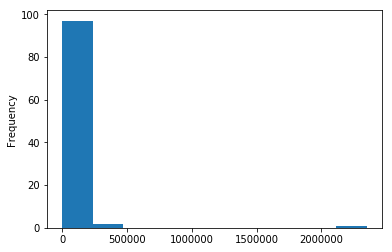

In [121]:
df.ltv.plot(kind='hist')